[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TomGeorge1234/ThetaSequencesAreEligibilityTraces/blob/main/EligibilitySequences.ipynb)

## Install dependencies

In [23]:
!pip install ratinabox==1.4.2
!pip install --upgrade tomplotlib 
!pip install tqdm

## Import necessary packages and utils functions 

In [19]:
# RUN THIS IF USING GOOGLE COLAB 
!pip install httpimport
import httpimport
with httpimport.github_repo('tomgeorge1234','ThetaSequencesAreEligibilityTraces'):
    from EligibilitySequences_utils import *

In [4]:
## OTHERWISE (if local file structure is available) JUST RUN THIS 
from EligibilitySequences_utils import *

In [1]:
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import PlaceCells
from ratinabox.contribs.ValueNeuron import ValueNeuron
from ratinabox.contribs.ThetaSequenceAgent import ThetaSequenceAgent

import numpy as np 

import os 
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
cmap = matplotlib.cm.get_cmap('viridis')
from tomplotlib import tomplotlib as tpl
tpl.figure_directory = "./figures/"
%load_ext autoreload
%autoreload 2

## Define some constants 

In [2]:
# globals
constants = {
'tau' : 4,  # timescale of value function (analagous to gamma)
'tau_N' : 0.01, #neuronal timescale
'size' : 2.0,  # size of 1D environment
'dx' : 0.005,  # discretisation of environment
'dx_cells' : 0.01,  # distance between basis features
'radius_cells' : 0.02,  # radius of each basis feature
'speed' : 0.1,  # agent speed in in ms-1
'dt' : 0.05,  # time discretisation
'L2' : 1e-6,  # L2 reg
'eta' : 1,  # learning rate
'theta_frac' : 0.75,  # sweep fraction
'theta_freq' : 5, # theta frequency 
}
constants['N_cells'] = int(constants['size'] / constants['dx_cells'])  # number of basis features

## Simulate normal RL with eligibility traces


### Run simulations and save results
See paper for terminating conditions 

In [6]:
#name, tau eta
params = [
    ('4',4,0.4),
    ('2',2,0.5),
    # ('1',1,0.6),
    # ('1_2',1/2,0.8),
    # ('1_4',1/4,1.1),
    # ('1_8',1/8,1. 3),
]

N_repeats = 3 # 50 in paper 
for (name,tau,eta) in params:
    constants['eta'] = eta
    results, (Env, Ag, Features, Reward, Value) = run_simulation(N_repeats=N_repeats, tau_e=tau, max_laps=32, agent_type='normal', **constants)
    if not os.path.isdir("./results/"):
        os.mkdir("./results/")
    pickle_and_save(results,f"taue_"+name)

Lap = 3.102, R2 = 0.999, CC = 1.000:  10%|▉         | 1240/12800 [00:02<00:25, 445.58it/s]


### Make plots

Figure saved to /Users/tomgeorge/Documents/UCL/EligibilitySweeps/figures/20_04_23/normal_trainingcurves_1003.png  & .svg


'./figures/20_04_23/normal_trainingcurves_1003'

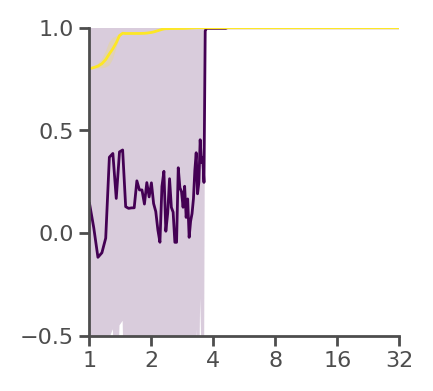

In [7]:
fig, ax = None, None
for (i,(name, tau, _)) in enumerate(params):
    color = cmap(i/(len(params)-1))
    # results = load_and_depickle("taue_"+name,directory="./results/final_results/learning_curves/") #paper results
    results = load_and_depickle("taue_"+name,directory="./results/")
    fig, ax = plot_r2(results,fig=fig,ax=ax,color=color,label=str(tau),**constants)
tpl.save_figure(fig,"normal_trainingcurves")

Figure saved to /Users/tomgeorge/Documents/UCL/EligibilitySweeps/figures/20_04_23/evolution_normal_2_1004.png  & .svg


'./figures/20_04_23/evolution_normal_2_1004'

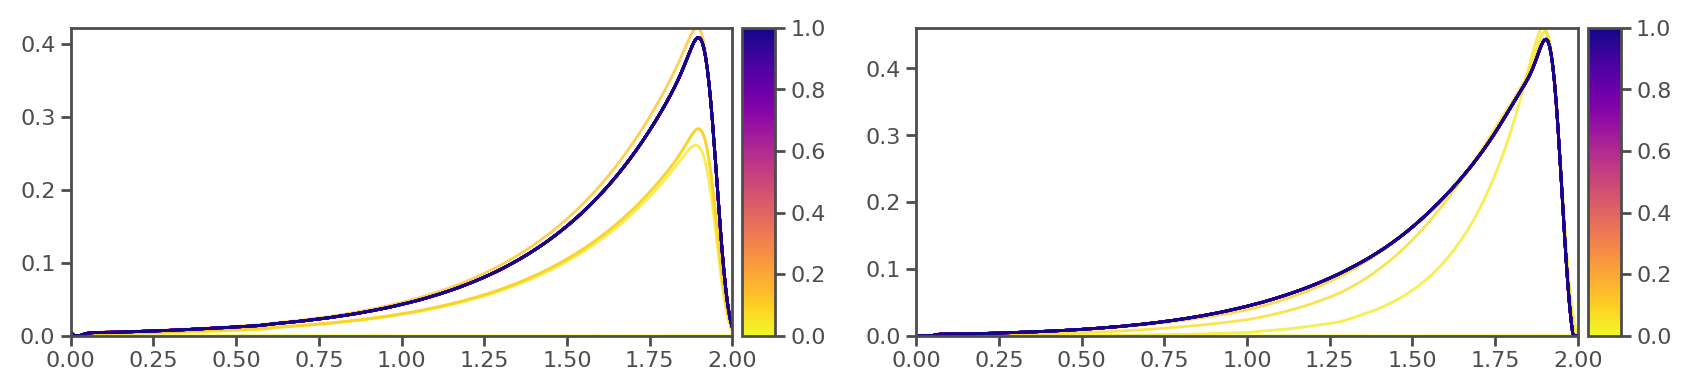

In [8]:
fig, ax = plt.subplots(1,len(params),figsize=(10,2))
for (i,(name, tau, _)) in enumerate(params):
    # results = load_and_depickle("taue_"+name,directory="./results/final_results/evolution/") #paper results 
    results = load_and_depickle("taue_"+name,directory="./results/")
    fig, ax[i] = plot_ratemap_evolution(results,fig=fig, ax=ax[i],**constants)
tpl.save_figure(fig,"evolution_normal_"+str(tau))

## Same but for the theta sweep agent 

In [16]:
#name, tau (--> converted to v_sweep) eta
params = [
    # ('4',4,8),
    # ('2',2,8),
    # ('1',1,2),
    # ('1_2',1/2,2),
    ('1_4',1/4,2),
    ('1_8',1/8,0.75),
]

N_repeats = 2 # 10 used in the paper

for (i,(name,tau,eta)) in enumerate(params):
    v_sweep = constants['speed']*((tau/constants['tau_N']) - 1)
    dt = min(0.003/v_sweep,0.003)
    constants['dt'] = dt
    constants['eta'] = eta
    results, (Env, Ag, Features, Reward, Value) = run_simulation(N_repeats=N_repeats, tau_e=constants['tau_N'], v_sweep=v_sweep,max_laps=32, agent_type='theta', **constants)
    pickle_and_save(results,f"sweep_"+name)

Lap = 13.700, R2 = 0.243, CC = 0.931:  43%|████▎     | 219860/512000 [01:30<01:59, 2435.09it/s]


KeyboardInterrupt: 

### make plots 

In [ ]:
params = [
    ('4',4,8),
    ('2',2,8),
    ('1',1,2),
    ('1_2',1/2,2),
    ('1_4',1/4,2),
    ('1_8',1/8,0.75),
]
fig, ax = None, None
for (i,(name, tau, _)) in enumerate(params):
    print(constants['speed']*((tau/constants['tau_N']) - 1)
)
    color = cmap(i/(len(params)-1))
    results = load_and_depickle("sweep_"+name,directory="./results/")
    fig, ax = plot_r2(results,fig=fig,ax=ax,color=color,label=str(tau),**constants)
tpl.saveFigure(fig,"theta_trainingcurves")

In [ ]:
fig, ax = plt.subplots(1,len(params),figsize=(10,2))
for (i,(name, tau, _)) in enumerate(params):
    results = load_and_depickle("sweep_"+name,directory="./results/")
    fig, ax[i] = plot_ratemap_evolution(results,fig=fig, ax=ax[i],**constants)
tpl.saveFigure(fig,"evolution_theta_"+str(tau))